In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
parameters = ['methodWeights', 'clusterAlgName', 'imageFeatureSetName', 
                  'matrixK', 'k', 'KNNorLSH', 'numLSHPermutations']
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 4), round(y[i], 4), ha = 'center')
        
def preprocess():
    folderNames = os.listdir('recommendation_results')
    folderNames.remove('ResNet152V2_Hierarchical')
    folderNames.remove('anirec_test_set.xlsx')
    folderNameToIndex = {k: v for v, k in enumerate(folderNames)}
    print(len(folderNames))
    ks = range(1, 51)
    return folderNames, folderNameToIndex, ks

def generatePrecisionPlot(ks, precisions):
    plt.plot(ks, np.mean(precisions, axis=0), label="line 1")
    plt.show()

def generatePrecisionPlotForGroup(ks, folderNames, folderNameToIndex, highlightedParameter=None):
    plt.figure(figsize=(10, 5))
    for folder in folderNames:
        precisions = np.load('recommendation_results/{}/precision for userIds in range 1-53.npy'.format(folder))
        label = 'set: {}'.format(
            folderNameToIndex[folder]) if highlightedParameter is None else folder.split()[highlightedParameter]
        plt.plot(ks, np.mean(precisions, axis=0), label=label)
#         if highlightedParameter is None:
#             print('set {} is {}'.format(folderNameToIndex[folder], folder))
    plt.ylabel('Precision')
    plt.xlabel('Number of Recommendations (k)')
    plt.title('Precision at k')
    plt.legend(loc='best')
    plt.show()

def generateRecallPlotForGroup(ks, folderNames, folderNameToIndex, highlightedParameter=None):
    plt.figure(figsize=(10, 5))
    for folder in folderNames:
        recalls = np.load('recommendation_results/{}/recall for userIds in range 1-53.npy'.format(folder))
        label = 'set: {}'.format(
            folderNameToIndex[folder]) if highlightedParameter is None else folder.split()[highlightedParameter]
        plt.plot(ks, np.mean(recalls, axis=0), label=label)
#         if highlightedParameter is None:
#             print('set {} is {}'.format(folderNameToIndex[folder], folder))
    plt.ylabel('Recall')
    plt.xlabel('Number of Recommendations (k)')
    plt.title('Recall at k')
    plt.legend(loc='best')
    plt.show()

def generatePlotsForGroup(ks, folderNames, folderNameToIndex, highlightedParameter=None):
    for folder in folderNames:
        print('set {} is {}'.format(folderNameToIndex[folder], folder))
    generatePrecisionPlotForGroup(ks, folderNames, folderNameToIndex, highlightedParameter)
    generateRecallPlotForGroup(ks, folderNames, folderNameToIndex, highlightedParameter)
    diversities = []
    overlap = []
    labels = []
    for folder in folderNames:
        f = open('recommendation_results/{}/diversity and overlap for userIds in range 1-53.txt'.format(folder), 'r')
        diversities.append(float(f.readline().split()[2]))
        overlap.append(float(f.readline().split()[10]))
        f.close()
        labels.append('set: {}'.format(
                folderNameToIndex[folder]) if highlightedParameter is None else folder.split()[highlightedParameter])
    plt.figure(figsize=(15, 5))
    plt.bar(labels, diversities, width = 0.4)
    addlabels(labels, diversities)
    plt.xlabel('hyperparameter set' if highlightedParameter is None else parameters[highlightedParameter])
    plt.ylabel('diversity score')
    plt.title('diversity')
    plt.show()
    plt.figure(figsize=(15, 5))
    plt.bar(labels, overlap, width = 0.4)
    addlabels(labels, overlap)
    plt.xlabel('hyperparameter set' if highlightedParameter is None else parameters[highlightedParameter])
    plt.ylabel('Personalization score')
    plt.title('average number of overlaping manga in recommendation result sets between users')
    plt.show()
    
def compareAll():
    folderNames, folderNameToIndex, ks = preprocess()
#     generateRecallPlotForGroup(ks, folderNames, folderNameToIndex)
#     generatePrecisionPlotForGroup(ks, folderNames, folderNameToIndex)
    for i in range(0,len(folderNames), 10):
        generatePlotsForGroup(ks, folderNames[i:i+10], folderNameToIndex)
#     generateRecallPlotForGroup(ks, folderNames[:10], folderNameToIndex)
#     generateRecallPlotForGroup(ks, folderNames[10:20], folderNameToIndex)
#     generateRecallPlotForGroup(ks, folderNames[20:30], folderNameToIndex)
#     generateRecallPlotForGroup(ks, folderNames[30:], folderNameToIndex)
#     generatePrecisionPlotForGroup(ks, folderNames[:10], folderNameToIndex)
#     generatePrecisionPlotForGroup(ks, folderNames[10:20], folderNameToIndex)
#     generatePrecisionPlotForGroup(ks, folderNames[20:30], folderNameToIndex)
#     generatePrecisionPlotForGroup(ks, folderNames[30:], folderNameToIndex)

def compareOneParameter(parameterIndex):
    parameters = ['methodWeights', 'clusterAlgName', 'imageFeatureSetName', 
                  'matrixK', 'k', 'KNNorLSH', 'numLSHPermutations']
    folderNames, folderNameToIndex, ks = preprocess()
    folderGroups = []
    for i in range(len(folderNames)):
        group = {folderNames[i]}
        outerFolder = folderNames[i].split()
        del outerFolder[parameterIndex]
        for j in range(len(folderNames)):
            innerFolder = folderNames[j].split()
            del innerFolder[parameterIndex]
#             print(innerFolder)
#             print(outerFolder)
            if outerFolder == innerFolder:
                if not any(folderNames[j] in sl for sl in folderGroups):
#                     print(innerFolder, 'innerFolder')
#                     print(outerFolder)
                    group.add(folderNames[j])
        if len(group) > 1:
            folderGroups.append(group)
    print("for", parameters[parameterIndex])
    for group in folderGroups:
        generatePlotsForGroup(ks, group, folderNameToIndex, highlightedParameter=parameterIndex)
#     for group in folderGroups:
#         group.sort()
#     folderGroups.sort()
#     folderGroups = list(folderGroups for folderGroups,_ in itertools.groupby(folderGroups))
#     print(len(folderGroups))
#     for group in folderGroups:
#         print("group index:", folderGroups.index(group))
#         for item in group:
#             print(item)
#         print('#############################')

40
set 0 is 0.5_0.5_1_1 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 KNN 32
set 1 is 0.5_1.5_1_0.5 ResNet152V2Max_100KmeansClustersScaled ResNet152V2Avg matrixK=36 k=65 KNN 32
set 2 is 0.5_1.5_1_0.5 ResNet50Avg_100KmeansClustersBase ResNet152V2Avg matrixK=36 k=65 KNN 32
set 3 is 0.5_1.5_1_0.5 ResNet50Max_100KmeansClustersScaled ResNet152V2Avg matrixK=36 k=65 KNN 32
set 4 is 0.5_1.5_1_0.5 ResNet50V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 KNN 32
set 5 is 0.5_2_0.5_0.5 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 KNN 32
set 6 is 0.5_2_0.5_0.5 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 LSH 128
set 7 is 0.5_2_0.5_0.5 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 LSH 16
set 8 is 0.5_2_0.5_0.5 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 LSH 256
set 9 is 0.5_2_0.5_0.5 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 LSH 32


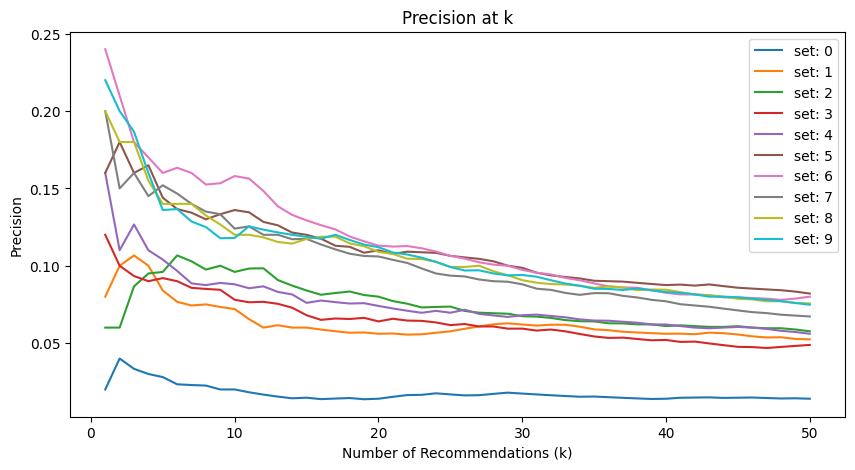

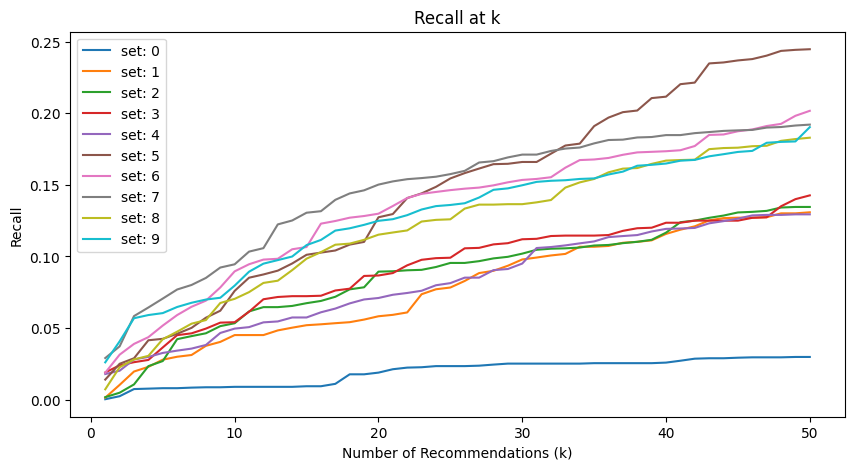

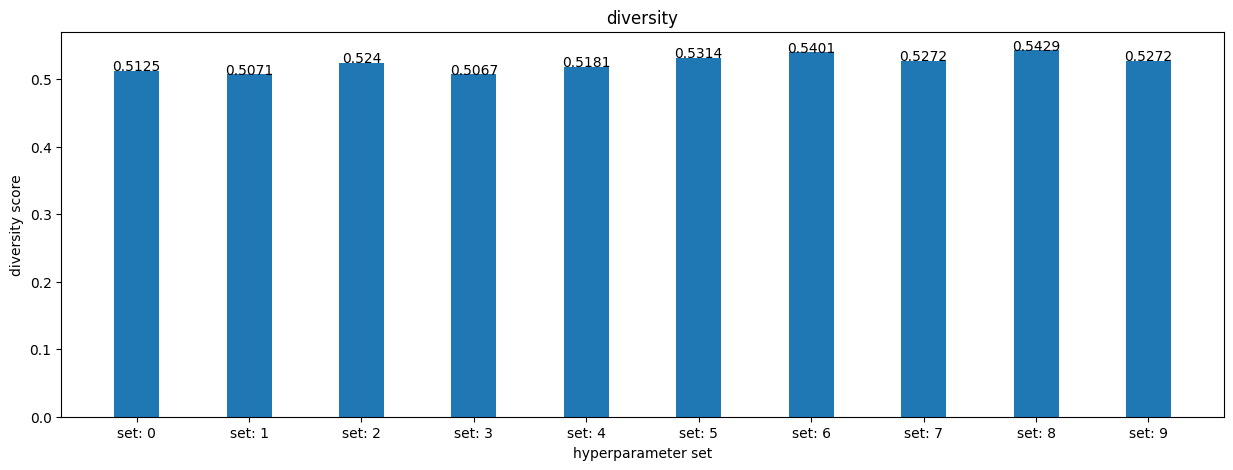

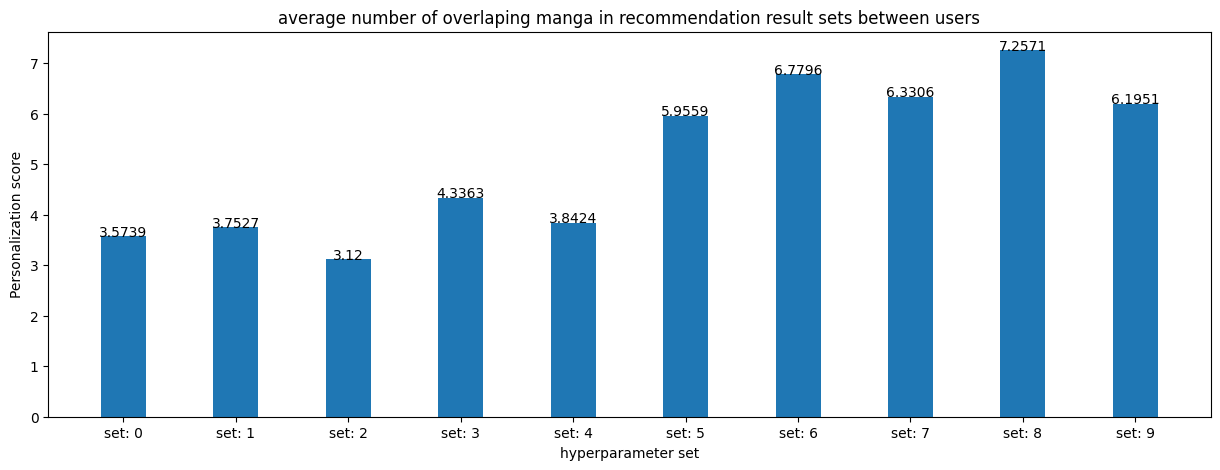

set 10 is 0.5_2_0.5_0.5 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 LSH 64
set 11 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152Avg matrixK=36 k=65 KNN 32
set 12 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152Max matrixK=36 k=65 KNN 32
set 13 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152V2Avg matrixK=36 k=65 KNN 32
set 14 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152V2Max matrixK=36 k=65 KNN 32
set 15 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50Avg matrixK=36 k=65 KNN 32
set 16 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50Max matrixK=36 k=65 KNN 32
set 17 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50V2Avg matrixK=36 k=65 KNN 32
set 18 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50V2Max matrixK=36 k=65 KNN 32
set 19 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152Avg matrixK=100 k=65 KNN 32


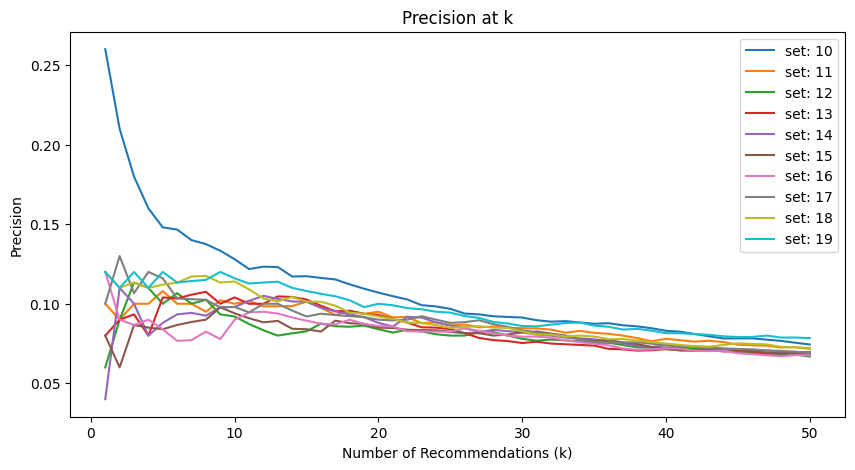

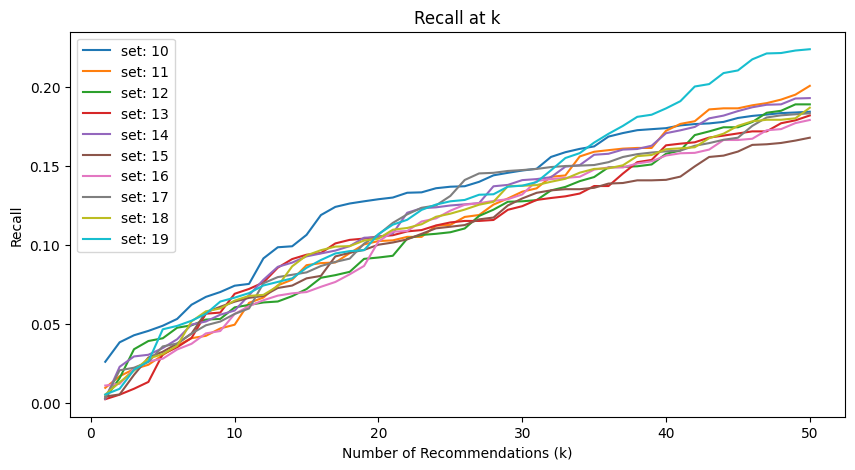

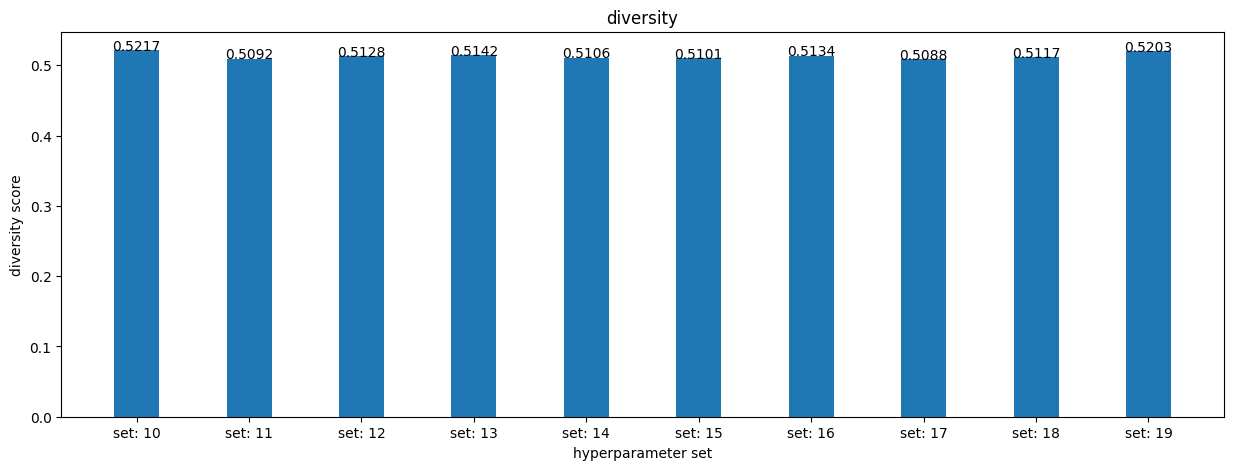

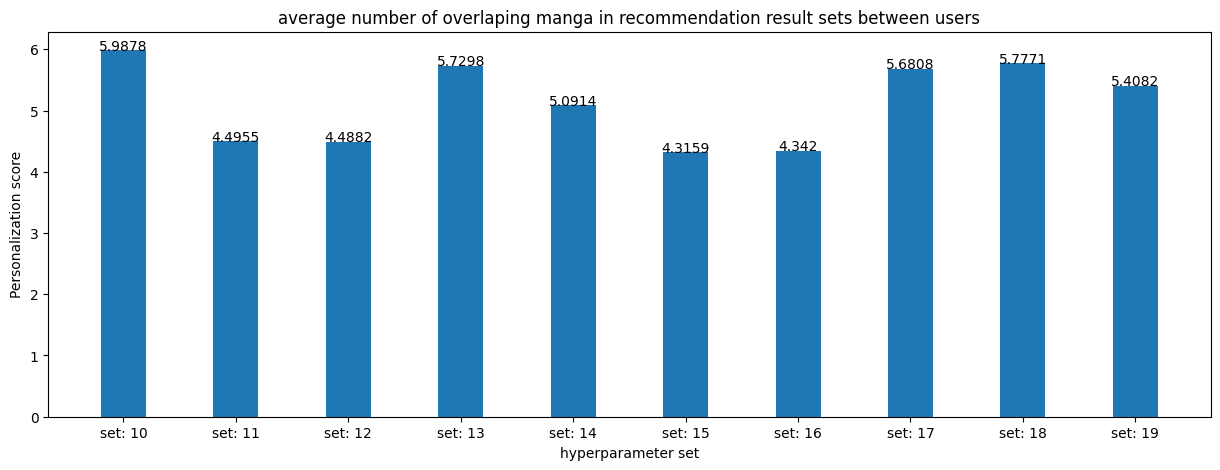

set 20 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152Max matrixK=100 k=65 KNN 32
set 21 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152V2Avg matrixK=100 k=65 KNN 32
set 22 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152V2Max matrixK=100 k=65 KNN 32
set 23 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50Avg matrixK=100 k=65 KNN 32
set 24 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50Max matrixK=100 k=65 KNN 32
set 25 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50V2Avg matrixK=100 k=65 KNN 32
set 26 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50V2Max matrixK=100 k=65 KNN 32
set 27 is 0_2_0_0 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=130 KNN 32
set 28 is 0_2_0_0 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=32 KNN 32
set 29 is 0_2_0_0 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 KNN 32


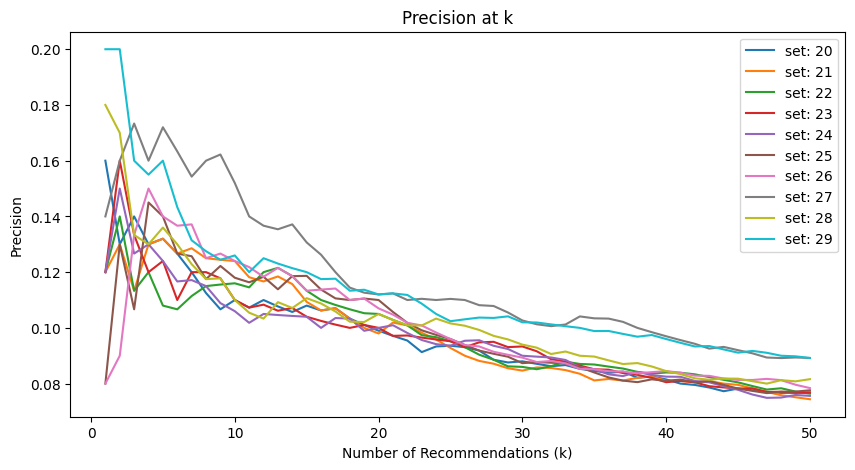

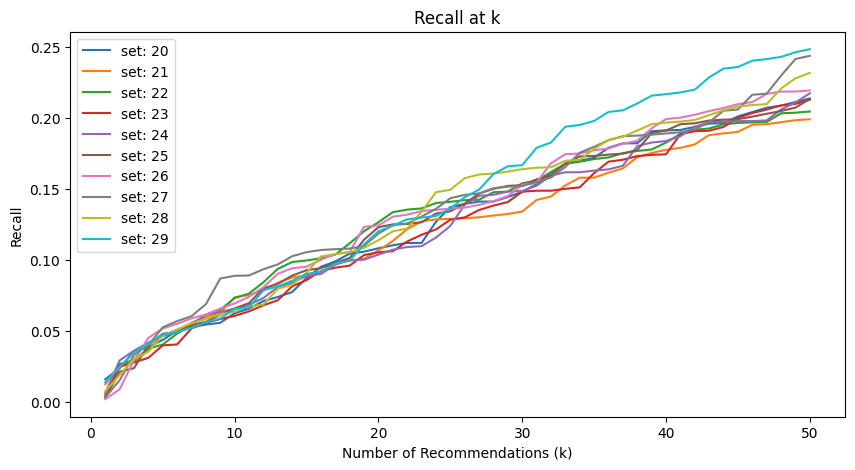

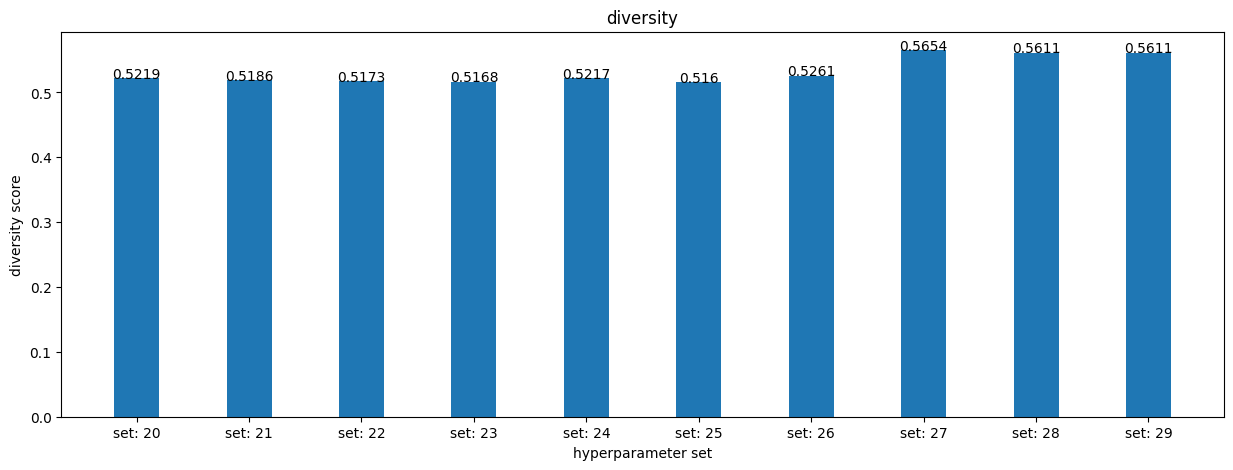

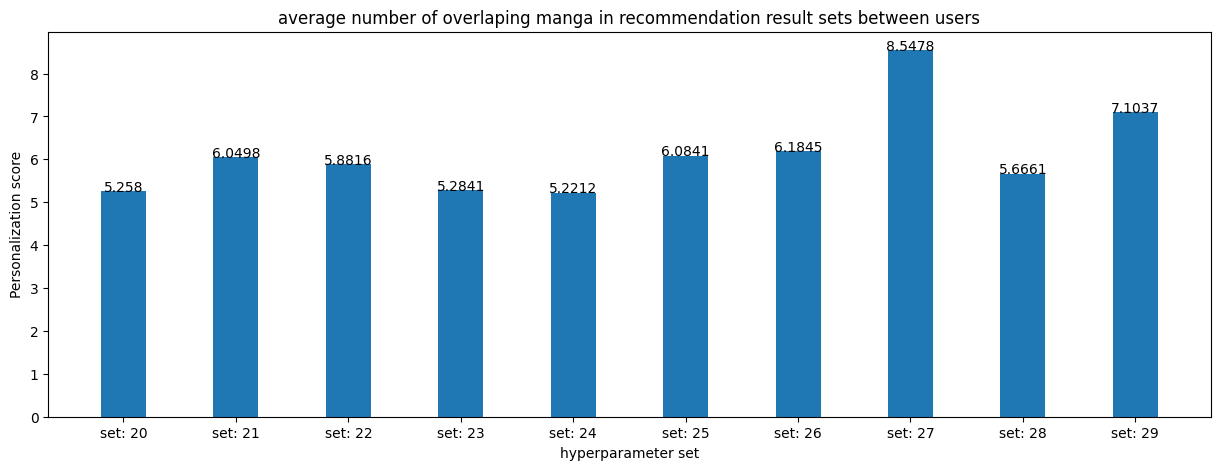

set 30 is 1_1_1_1 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 KNN 32
set 31 is 1_2_0.5_0.5 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=130 KNN 32
set 32 is 1_2_0.5_0.5 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=32 KNN 32
set 33 is 1_2_0.5_0.5 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 KNN 32
set 34 is 1_2_0.5_1 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=100 k=65 KNN 32
set 35 is 1_2_0.5_1 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=20 k=65 KNN 32
set 36 is 1_2_0.5_1 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=38 k=65 KNN 32
set 37 is 1_2_0.5_1 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=76 k=65 KNN 32
set 38 is 1_2_0.7_0.7 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 KNN 32
set 39 is 2_1_1_1 ResNet152V2Avg_100HierarchicalClusters ResNet152V2Avg matrixK=36 k=65 KNN 32


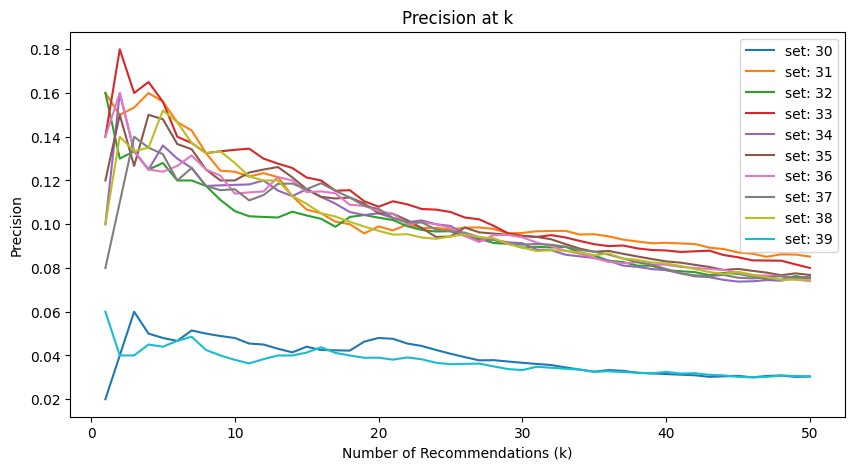

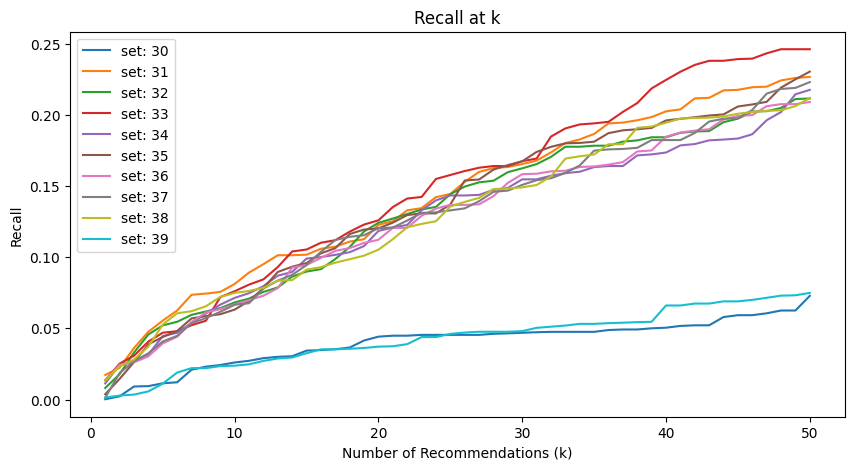

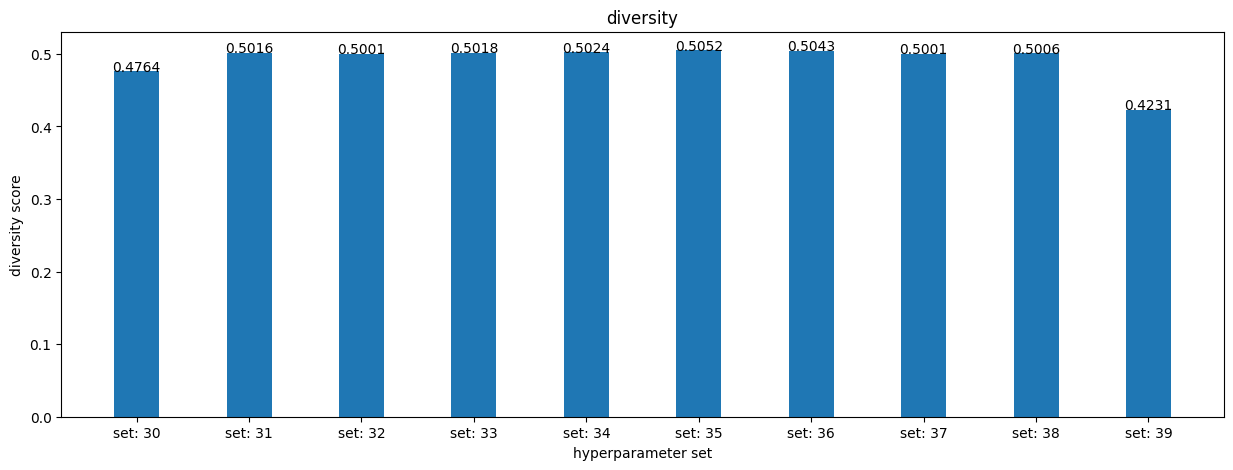

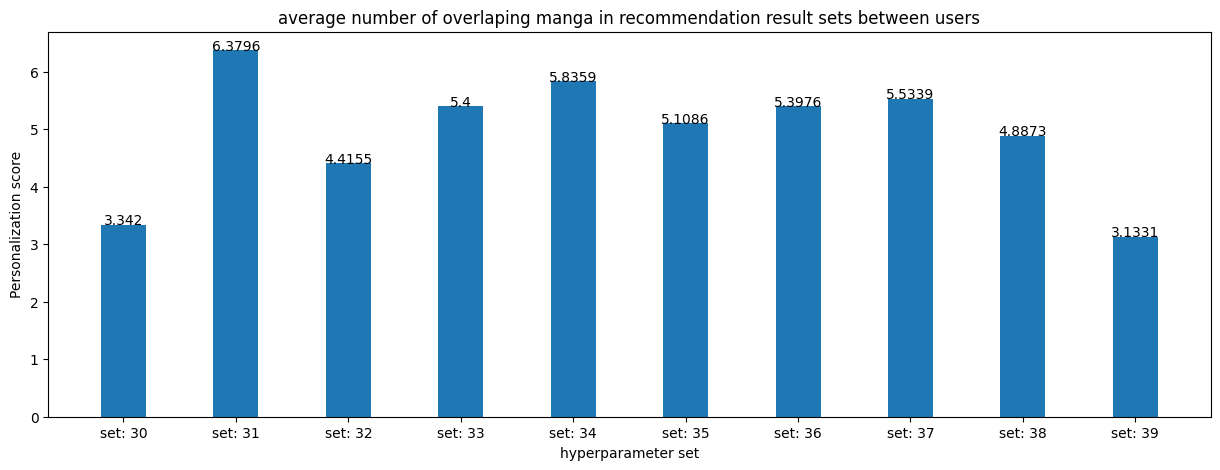

In [201]:
compareAll()

48
for imageFeatureSetName
set 23 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50Avg matrixK=36 k=65 KNN 32
set 21 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152V2Avg matrixK=36 k=65 KNN 32
set 22 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152V2Max matrixK=36 k=65 KNN 32
set 26 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50V2Max matrixK=36 k=65 KNN 32
set 24 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50Max matrixK=36 k=65 KNN 32
set 25 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50V2Avg matrixK=36 k=65 KNN 32
set 20 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152Max matrixK=36 k=65 KNN 32
set 19 is 0.7_1.5_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152Avg matrixK=36 k=65 KNN 32


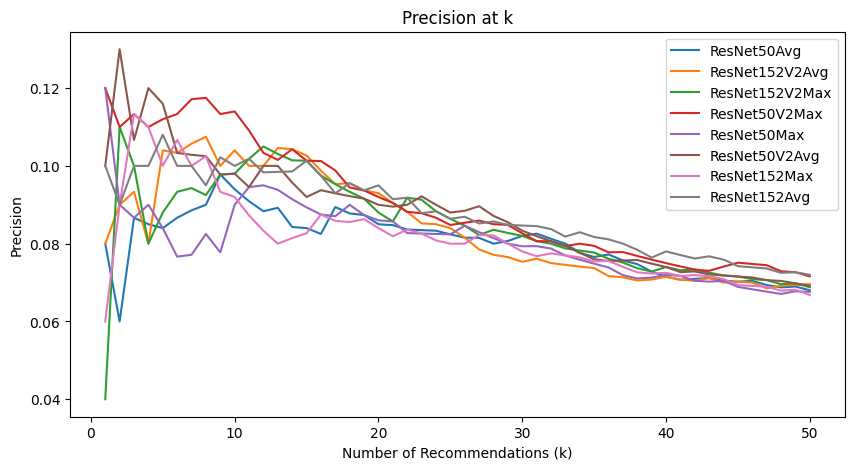

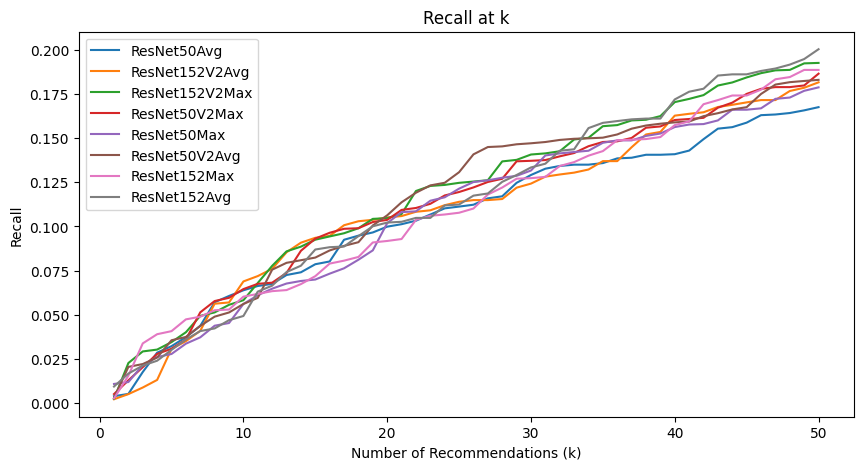

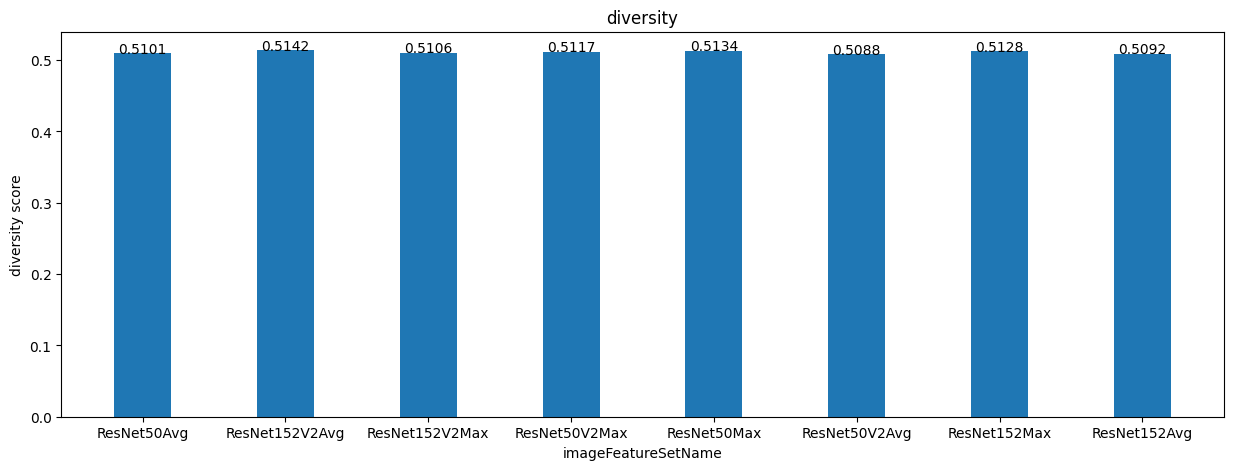

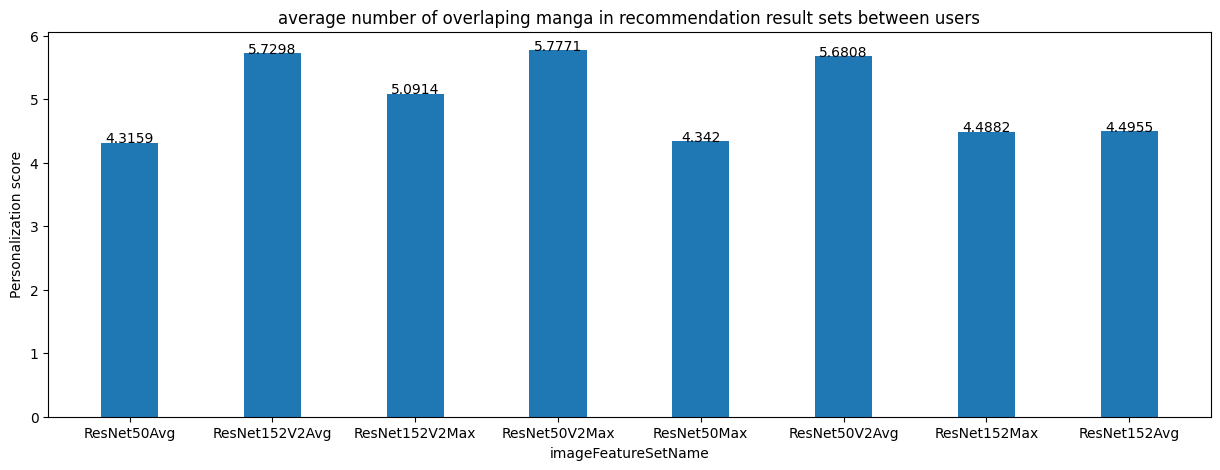

set 27 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152Avg matrixK=100 k=65 KNN 32
set 30 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152V2Max matrixK=100 k=65 KNN 32
set 32 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50Max matrixK=100 k=65 KNN 32
set 33 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50V2Avg matrixK=100 k=65 KNN 32
set 28 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152Max matrixK=100 k=65 KNN 32
set 31 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50Avg matrixK=100 k=65 KNN 32
set 34 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet50V2Max matrixK=100 k=65 KNN 32
set 29 is 0.7_2_0.5_1 ResNet50Avg_100KmeansClustersBase ResNet152V2Avg matrixK=100 k=65 KNN 32


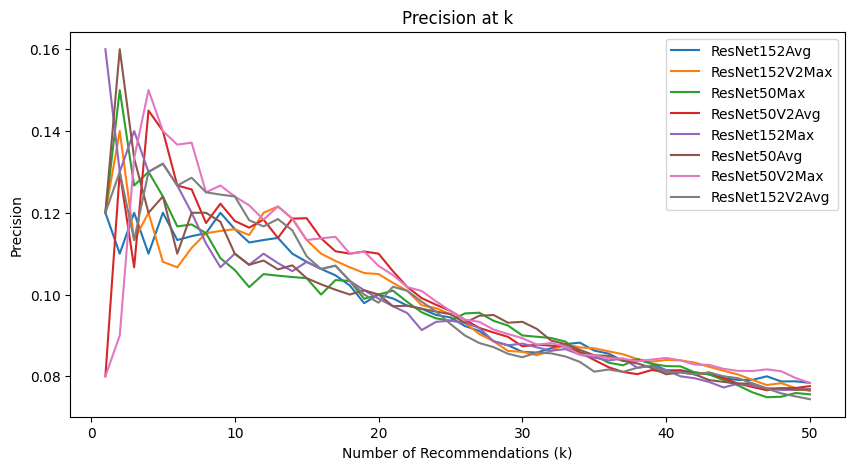

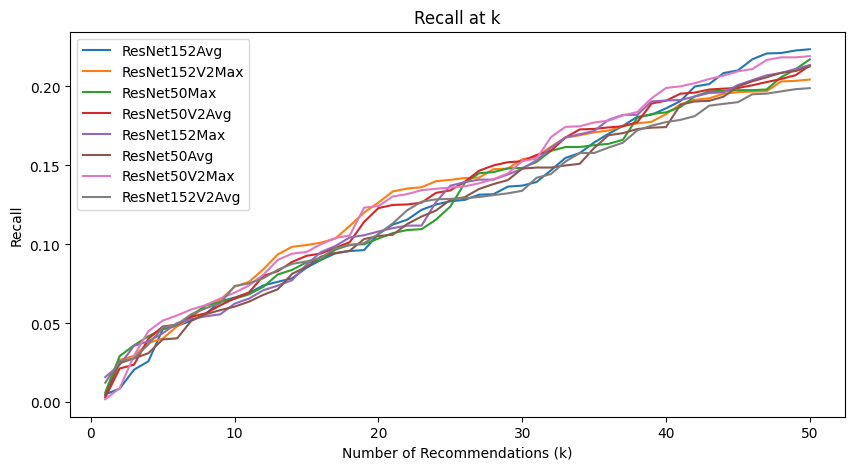

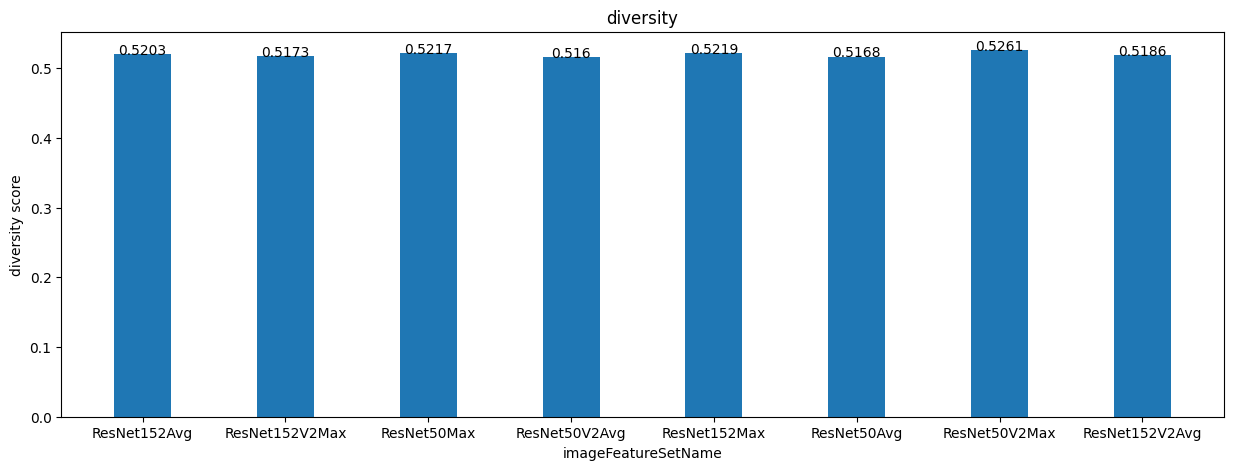

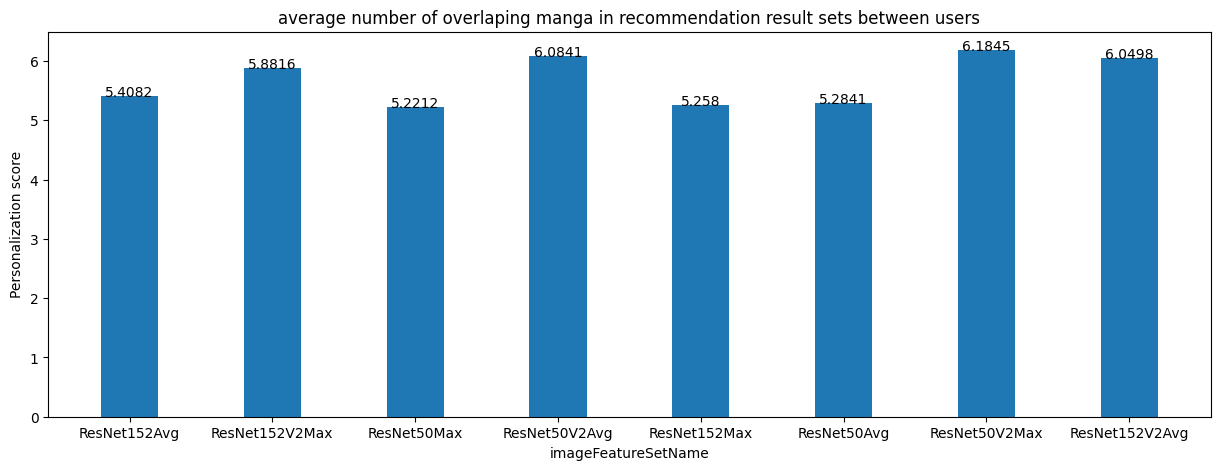

In [4]:
# folderNames, folderNameToIndex, ks = preprocess()
# folderGroups = []
# outerFolder = folderNames[0].split()
# del outerFolder[1]
# innerFolder = folderNames[5].split()
# del innerFolder[1]
# print(innerFolder)
# print(outerFolder)
# print(outerFolder == innerFolder)
compareOneParameter(2)